# Imports

In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

# Question 1

This task asks us to illustrate the given set in
an Edgeworth box. Thus, we have illustrated the set of allocations (combinations of x1 and x2) that are Pareto improvements over the initial endowments of two consumers, A and B, in an exchange economy. We utilized the given utility functions for both consumers and iterated them over a grid of possible allocations to determine which ones would make both consumers at least as well off as they were with their initial endowments.

The plot illustrates the initial endowments as a black square and the blue dots represent the allocations that are Pareto improvements. The blue area displays all the allocations where both consumers are better off compared to their intital endowments: Neither can be made better off without making the other worse off.

The blue regions reflect the potential gains from trade. Any trade resulting in an allocation within this area is beneficial for both parties. Thus, we are given the core concept of exchange economies where it is possible to reach more efficient and mutually beneficial outcomes through trade.


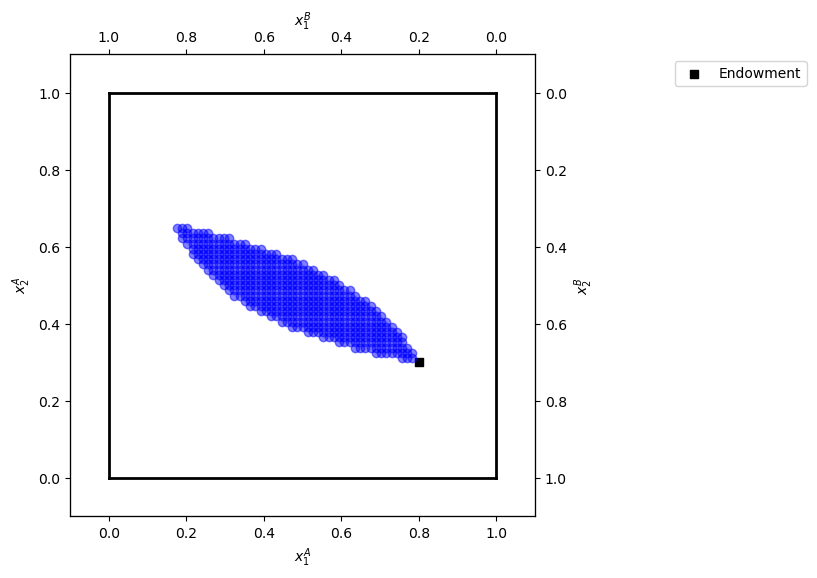

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters and initial endowments
alpha = 1/3
beta = 1/3
w1A = 0.8
w2A = 0.3
w1B = 1 - w1A
w2B = 1 - w2A

# Utility functions
def utility_A(x1, x2, alpha=alpha):
    return (x1**alpha) * (x2**(1-alpha))

def utility_B(x1, x2, beta=beta):
    return (x1**beta) * (x2**(1-beta))

# Initial utility with given endowments
initial_utility_A = utility_A(w1A, w2A)
initial_utility_B = utility_B(w1B, w2B)

# Figure setup from provided code snippet
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plot endowment point
ax_A.scatter(w1A, w2A, marker='s', color='black', label='Endowment')

# Limits
w1bar = 1.0
w2bar = 1.0
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

# Set limits for axes
ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

# Legend
ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))

# Plot the Pareto improvement area
N = 75
x1_range = np.linspace(0, w1bar, N)
x2_range = np.linspace(0, w2bar, N)
X1, X2 = np.meshgrid(x1_range, x2_range)
pareto_improvements = []

# Combination for Pareto improvement
for x1 in x1_range:
    for x2 in x2_range:
        # Consumer A's remaining endowment
        w1A_remaining = w1bar - x1
        w2A_remaining = w2bar - x2
        
        # Corresponding consumption for B
        x1B = w1bar - x1
        x2B = w2bar - x2

        # Calculate utilities for the current allocation
        current_utility_A = utility_A(x1, x2)
        current_utility_B = utility_B(x1B, x2B)

        # Check if both utilities are at least as large as the initial utilities
        if current_utility_A >= initial_utility_A and current_utility_B >= initial_utility_B:
            pareto_improvements.append((x1, x2))

# x1 and x2 coordinates for Pareto improvements
pareto_x1, pareto_x2 = zip(*pareto_improvements)

# Plot the Pareto improvement area on the Edgeworth box
ax_A.scatter(pareto_x1, pareto_x2, alpha=0.5, label='Pareto improvements', color='blue')

plt.show()



# Question 2

2) The equilibrium price of good 1 is indicated by the resulting graphs' convergence towards the lines where errors equal zero. The market-clearing price, at which supply and demand for both items are equal, is shown by the intersection of the red dashed line and the error lines. The equilibrium is located where the market clearance mistakes are reduced, which show how sensitive the market equilibrium is to changes in price.

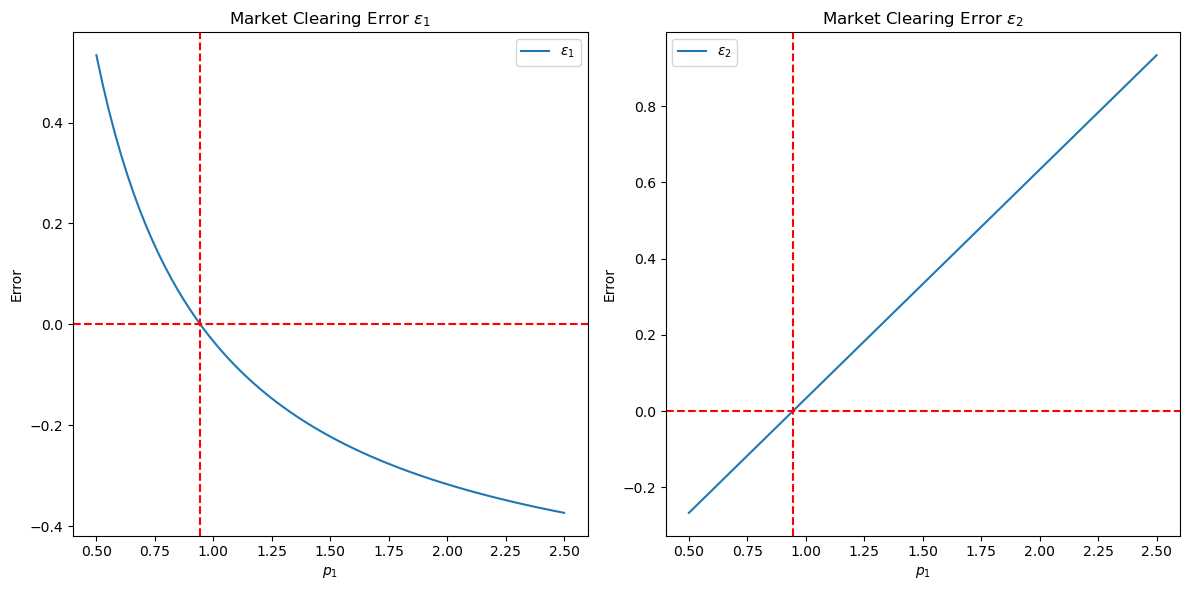

In [18]:
# Price range for p1
import matplotlib.pyplot as plt
p1_values = np.linspace(0.5, 2.5, N+1)

# Initial endowments for B
alpha = 1/3
beta = 2/3
omega_A1 = 0.8
omega_A2 = 0.3
N = 75
omega_B1 = 1 - omega_A1
omega_B2 = 1 - omega_A2

# Error calculations
errors_1 = []
errors_2 = []

for p1 in p1_values:
    # Demand calculations
    x_A1_star = alpha * ((omega_A1 * p1 + omega_A2) / p1)
    x_A2_star = (1 - alpha) * (omega_A1 * p1 + omega_A2)
    x_B1_star = beta * ((omega_B1 * p1 + omega_B2) / p1)
    x_B2_star = (1 - beta) * (p1 * omega_B1 + omega_B2)
    
    # Market clearing errors
    epsilon_1 = x_A1_star + x_B1_star - omega_A1 - omega_B1
    epsilon_2 = x_A2_star + x_B2_star - omega_A2 - omega_B2
    
    errors_1.append(epsilon_1)
    errors_2.append(epsilon_2)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(p1_values, errors_1, label=r'$\epsilon_1$')
plt.xlabel('$p_1$')
plt.ylabel('Error')
plt.title('Market Clearing Error $\epsilon_1$')
plt.axhline(0, color='red', linestyle='--')
plt.axvline(0.944, color='red', linestyle='--')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(p1_values, errors_2, label=r'$\epsilon_2$')
plt.xlabel('$p_1$')
plt.ylabel('Error')
plt.title('Market Clearing Error $\epsilon_2$')
plt.axhline(0, color='red', linestyle='--')
plt.axvline(0.944, color='red', linestyle='--')
plt.legend()

plt.tight_layout()
plt.show()

# Question 3

We are asked to determine the market clearing price. We simulated the given exchange economy to find the market clearing price for good 1, which is approximately 0.9444. This was achieved by iteratively adjusting the price until the aggregate demand from both consumers equaled the total endowment. The result reflects an equilibrium state in the economy, where the market is perfectly efficient with no excess supply or demand.

In [4]:
from ExchangeEconomy import ExchangeEconomyClass

alpha = 1/3
beta = 2/3
endowment_A = [0.8, 0.3]

economy = ExchangeEconomyClass(alpha, beta, endowment_A)

# Market clearing price
p1_clearing = economy.market_clearing_price()
print(f'Market clearing price (p1): {p1_clearing:.3f}')

Market clearing price (p1): 0.944


# Question 4

Consumer A seeks the price that maximizes her utility, given the set of possible (positive) prices.

In question 4a, where only a set of predefined prices are considered, the optimal price for good 1 is 1.500, resulting in the allocation of [0.333,1.000] for consumer A and [0.444,0.333] for consumer B.

In question 4b, where consumer A can choose any positive price, the optimal price jumps to 10.000, with consumer A receiving a much larger quantity of good 2 
[0.277,5.533], whereas consumer B's allocation is 
[0.180,0.900].

This demonstrates that allowing consumer A to choose from any positive price leads to an extreme allocation in her favor, reflecting the impact of price flexibility on resource distribution in a market.

In [8]:
# Question 4a
P1 = [0.5, 1.5] # Assuming a set of prices
p1_optimal_4a, allocation_A_4a, allocation_B_4a = economy.allocation_prices_in_P1(P1)
print(f'Optimal price and allocation in P1: {p1_optimal_4a:.3f}, '
      f'[{allocation_A_4a[0]:.3f}, {allocation_A_4a[1]:.3f}], '
      f'[{allocation_B_4a[0]:.3f}, {allocation_B_4a[1]:.3f}]')

Optimal price and allocation in P1: 1.500, [0.333, 1.000], [0.444, 0.333]


In [9]:
# Question 4b
p1_optimal_4b, allocation_A_4b, allocation_B_4b = economy.allocation_any_positive_price()
print(f'Optimal price and allocation for any positive price: {p1_optimal_4b:.3f}, '
      f'[{allocation_A_4b[0]:.3f}, {allocation_A_4b[1]:.3f}], '
      f'[{allocation_B_4b[0]:.3f}, {allocation_B_4b[1]:.3f}]')

Optimal price and allocation for any positive price: 10.000, [0.277, 5.533], [0.180, 0.900]


# Question 5

5a) The optimal allocation found is following:
[0.5757,0.8444]
[0.5757,0.8444]
This reflects a scenario where consumer A's utility is maximized within the constraints of set C, ensuring no detriment to consumer B’s welfare. This aligns with the Pareto efficiency criterion.

In [10]:
#5a
from scipy.optimize import minimize
import numpy as np


# Define utility functions
def u_A(x1, x2, alpha=1/3):
    return (x1**alpha) * (x2**(1-alpha))


def u_B(x1, x2, beta=2/3):
    return (x1**beta) * (x2**(1-beta))


# Initial endowments
omega1_A, omega2_A = 0.8, 0.3
omega1_B, omega2_B = 1 - omega1_A, 1 - omega2_A


# Initial utility levels
uA_initial = u_A(omega1_A, omega2_A)
uB_initial = u_B(omega1_B, omega2_B)


# Constraint functions
def constraint_A(x):
    return u_A(x[0], x[1]) - uA_initial


def constraint_B(x):
    return u_B(1 - x[0], 1 - x[1]) - uB_initial


# Constraints for 5a
constraints_5a = [
    {'type': 'ineq', 'fun': constraint_A},
    {'type': 'ineq', 'fun': constraint_B}
]


# Initial guess
x0 = np.array([omega1_A, omega2_A])


# Optimization for 5a
result_5a = minimize(lambda x: -u_A(x[0], x[1]), x0, constraints=constraints_5a, bounds=[(0,1), (0,1)])


if result_5a.success:
    print("Optimal allocation for 5a (x1, x2):", result_5a.x)
else:
    print("Optimization for 5a was unsucessful.")

Optimal allocation for 5a (x1, x2): [0.57574249 0.84443971]


5b) The optimal allocation here is also at
[0.5757,0.8444]
[0.5757,0.8444], which indicates that even when consumer A can maximize utility without constraints, the outcome is Pareto efficient and does not harm consumer B's welfare.


In [11]:
# Constraints for 5b
constraints_5b = [
    {'type': 'ineq', 'fun': constraint_B}
]


# Optimization for 5b
result_5b = minimize(lambda x: -u_A(x[0], x[1]), x0, constraints=constraints_5b, bounds=[(0,1), (0,1)])


if result_5b.success:
    print("Optimal allocation for 5b (x1, x2):", result_5b.x)
else:
    print("Optimization for 5b was unsuccessful.")

Optimal allocation for 5b (x1, x2): [0.57574506 0.84443779]


# Question 6

6a) 
To find the resulting allocation based on as social planner function maximising aggregate utility we define our aggregate utility as the sum of the consumption of the goods for both buyers equal to 1. We place an initial guess for the consumption to each be 0.5 and restrict that the consumption of the goods is in the interval [0;1]. To finally find the resulting allocation we run a code to minimise the aggregate utility function. 

From this we find: 
Optimal allocations: xA1 = 0.333, xA2 = 0.667
Maximum aggregate utility: 1.058

In [1]:
from scipy.optimize import minimize
import numpy as np

# Parameters
alpha = 1/3
beta = 2/3

# Aggregate utility function
def aggregate_utility(x):
    xA1, xA2 = x
    xB1 = 1 - xA1
    xB2 = 1 - xA2
    return -(xA1**alpha * xA2**(1-alpha) + xB1**beta * xB2**(1-beta))

# Initial guess
x0 = [0.5, 0.5]

# Bounds for xA1 and xA2
bounds = ((0, 1), (0, 1))

# Solve the optimization problem
result = minimize(aggregate_utility, x0, bounds=bounds, method='SLSQP')

print("Optimal allocations: xA1 = {:.3f}, xA2 = {:.3f}".format(result.x[0], result.x[1]))
print("Maximum aggregate utility: {:.3f}".format(-result.fun))

Optimal allocations: xA1 = 0.333, xA2 = 0.667
Maximum aggregate utility: 1.058


6b) 
From our results in this task we see that allocations in favour of the equilibrium in task 3 differed mored than those of task 4 and 5 where we maximised individual utilities to find the pareto optimal state. We see that maximising aggregate utility could lead to a better welfare in the economy but may result in less fairness and more constricted market dynamics.

 We calculated allocations that ensure market efficiency (question 3) and compared them with allocations maximizing aggregate utility (questions 4 and 5). The code we ran in this task was run to identify which of the two scenarios best enhanced the welfare, of which we saw that the case of question 3 ensures efficiency whilst that of questions 4 and 5 increases the welfare but results in less fairness and more constricted market dynamics, as summarised above.  

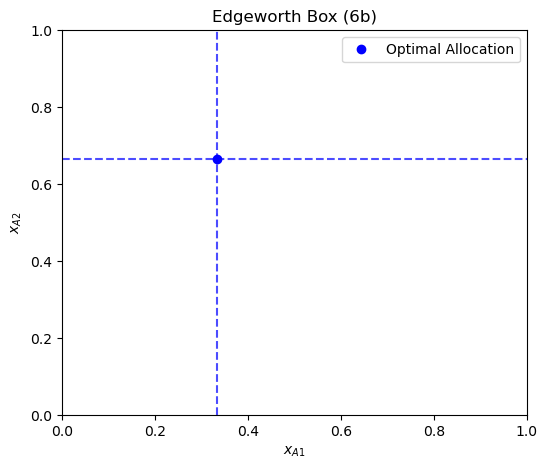

In [5]:
import matplotlib.pyplot as plt

# Edgeworth Box dimensions
box_size = 1

# Optimal allocations
xA1_opt, xA2_opt = result.x
xB1_opt, xB2_opt = 1 - xA1_opt, 1 - xA2_opt

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 5))

# Plot the optimal allocation
ax.plot([xA1_opt], [xA2_opt], 'bo', label='Optimal Allocation')

# Setting limits for clarity
ax.set_xlim(0, box_size)
ax.set_ylim(0, box_size)

# Adding labels and legend
ax.set_xlabel('$x_{A1}$')
ax.set_ylabel('$x_{A2}$')
ax.axhline(y=xA2_opt, color='b', linestyle='--', alpha=0.7)  # Add horizontal line at y = xA2_opt
ax.axvline(x=xA1_opt, color='b', linestyle='--', alpha=0.7)  # Add vertical line at x = xA1_opt
ax.legend()

#Show plot
plt.title('Edgeworth Box (6b)')
plt.show()

# Question 7

7) The task results show a uniform distribution of endowments across the unit square, suggesting a broad range of initial conditions for the exchange economy. The results demonstrate a wide influence on potential market outcomes, with each dot representing a unique resource distribution between consumers A and B. The data points don't appear to be concentrated in one area, suggesting that every customer has a distinct capacity for utility and isn't drawn to a specific area of the plot.

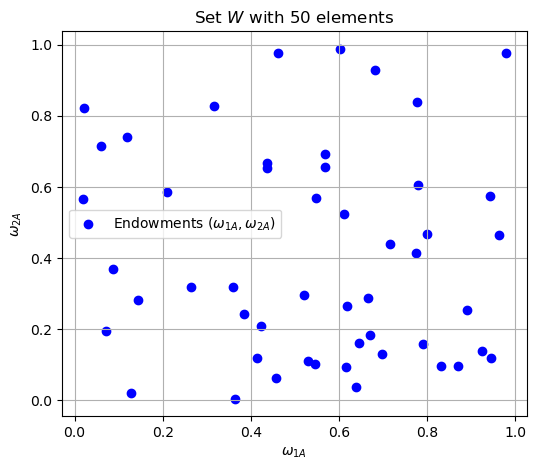

[[0.5488135  0.57019677]
 [0.71518937 0.43860151]
 [0.60276338 0.98837384]
 [0.54488318 0.10204481]
 [0.4236548  0.20887676]
 [0.64589411 0.16130952]
 [0.43758721 0.65310833]
 [0.891773   0.2532916 ]
 [0.96366276 0.46631077]
 [0.38344152 0.24442559]]


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Number of elements in the set W
n_elements = 50

# Generating W with 50 elements
np.random.seed(0)  # For reproducibility
omega_1A = np.random.uniform(0, 1, n_elements)
omega_2A = np.random.uniform(0, 1, n_elements)
W = np.column_stack((omega_1A, omega_2A))

# Visualizing the set W
plt.figure(figsize=(6, 5))
plt.scatter(W[:, 0], W[:, 1], color='blue', label='Endowments $(\omega_{1A}, \omega_{2A})$')
plt.title('Set $W$ with 50 elements')
plt.xlabel('$\omega_{1A}$')
plt.ylabel('$\omega_{2A}$')
plt.grid(True)
plt.legend()
plt.show()

# Print the 50 elements
print(W[:10])

# Question 8

8) The equilibrium allocations for different initial endowments were plotted, showing the market's adaptation to initial resource distribution. The economic response to endowment changes was reflected in the Edgeworth box patterns.


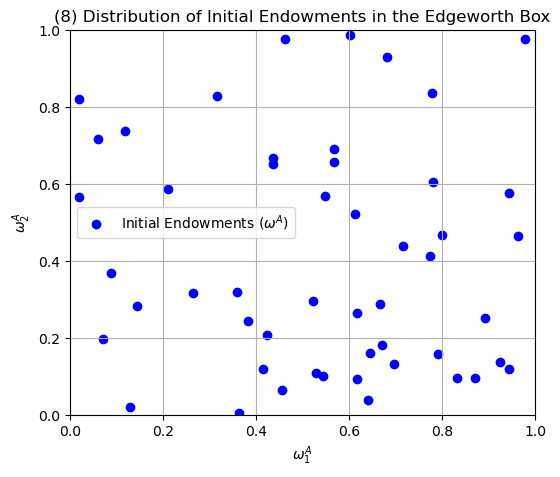

In [16]:
import numpy as np
import matplotlib.pyplot as plt


# seed for reproducibility
np.random.seed(0)


# Generate 50 pairs of initial endowments for ω1A and ω2A from a uniform distribution
endowments_ω1A = np.random.uniform(0, 1, 50)
endowments_ω2A = np.random.uniform(0, 1, 50)


# Plotting the initial endowments in an Edgeworth Box
plt.figure(figsize=(6, 5))
plt.scatter(endowments_ω1A, endowments_ω2A, color='blue', label='Initial Endowments ($\omega^A$)')
plt.title('(8) Distribution of Initial Endowments in the Edgeworth Box')
plt.xlabel('$\omega_1^A$')
plt.ylabel('$\omega_2^A$')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()
